In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import sys 
from utils.plot import plot_stroke
from utils.data_generator import DataGenerator
from utils.data_utils import convert_one_hot_encoding_to_sentence, get_standard_normalization_params

sys.path.insert(0,'..')

strokes_file_path = './data/strokes.npy'
labels_file_path = './data/sentences.txt'
batch_size = 30
max_num_of_chars = 14
sequence_length = 200

In [2]:
datagen = DataGenerator(strokes_file_path=strokes_file_path, labels_file_path=labels_file_path)

In [3]:
x_values = []
for sentence in datagen.strokes:
    x_values.extend(sentence[:, 1])
print('x std: ', np.std(x_values))
print('x mean: ', np.mean(x_values))

x std:  2.0943575
x mean:  0.41900063


In [4]:
y_values = []
for sentence in datagen.strokes:
    y_values.extend(sentence[:, 2])
print('y std: ', np.std(y_values))
print('y mean: ', np.mean(y_values))

y std:  1.8706665
y mean:  -0.006098041


In [5]:
batch_generator_unconditional, validation_set_unconditional = datagen.generate_unconditional_dataset(
                                                                batch_size=batch_size,
                                                                sequence_length=sequence_length)

In [6]:
batch_generator_conditional, validation_set_conditional = datagen.generate_conditional_dataset(
                                                            batch_size=batch_size,
                                                            max_num_of_chars=max_num_of_chars,
                                                            sequence_length=sequence_length)

0.9354838709677419
0.9354838709677419
0.9354838709677419
0.9354838709677419
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.7333333333333333
0.7333333333333333
0.7333333333333333
1.2
1.2
1.2
1.2
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.1333333333333333
1.1333333333333333
1.15
1.15
1.0
1.0
1.0
0.6428571428571429
0.6428571428571429
0.6428571428571429
0.9523809523809523
0.9523809523809523
0.8571428571428571
0.8571428571428571
0.8571428571428571
0.8571428571428571
0.7209302325581395
0.7209302325581395
0.7209302325581395
0.975609756097561
0.975609756097561
0.975609756097561
0.975609756097561
0.975609756097561
0.78125
0.78125
0.78125
1.2272727272727273
1.2272727272727273
1.1176470588235294
1.1176470588235294
1.1176470588235294
0.38095238095238093
0.38095238095238093
0.38095238095238093
0.7777777777777778
0.7777777777777778
0.7777777777777778
0.7777777777777778
0.8888888888888888
0.8888888888888888
0.8888888888888888
0.8888888888888888
0.9629629629629629
0.9629629629629629
0.9629629629629

0.9473684210526315
0.9473684210526315
1.1538461538461537
1.1538461538461537
1.1538461538461537
0.9642857142857143
0.9642857142857143
0.9642857142857143
1.088235294117647
1.088235294117647
1.088235294117647
1.1142857142857143
1.1142857142857143
1.1142857142857143
0.7333333333333333
0.7333333333333333
0.7391304347826086
0.7391304347826086
0.9230769230769231
0.9230769230769231
0.9230769230769231
1.1111111111111112
1.1111111111111112
0.9642857142857143
0.9642857142857143
0.9642857142857143
0.9642857142857143
0.7567567567567568
0.7567567567567568
0.7567567567567568
0.7567567567567568
0.6
0.6
0.6
0.6
0.8888888888888888
0.8888888888888888
0.8888888888888888
0.8888888888888888
0.8888888888888888
0.5925925925925926
0.5925925925925926
0.5925925925925926
0.5925925925925926
0.41935483870967744
0.41935483870967744
0.41935483870967744
0.41935483870967744
0.41935483870967744
0.41935483870967744
1.0
1.0
1.0
1.0384615384615385
1.0384615384615385
1.0384615384615385
1.25
1.25
1.0588235294117647
1.0588235

0.8275862068965517
0.8275862068965517
0.8275862068965517
0.8275862068965517
1.434782608695652
1.434782608695652
1.0
1.0
1.0
1.0
0.7777777777777778
0.7777777777777778
0.5652173913043478
0.5652173913043478
0.45161290322580644
0.45161290322580644
0.45161290322580644
0.7222222222222222
0.7222222222222222
1.0740740740740742
1.0740740740740742
1.0740740740740742
1.0740740740740742
1.0
1.0
1.0
0.5925925925925926
0.5925925925925926
0.5925925925925926
0.6578947368421053
0.6578947368421053
0.6578947368421053
0.6578947368421053
0.8571428571428571
0.8571428571428571
0.7931034482758621
0.7931034482758621
0.7931034482758621
1.04
1.04
1.04
0.7575757575757576
0.7575757575757576
0.7575757575757576
0.9310344827586207
0.9310344827586207
0.9310344827586207
0.9310344827586207
1.0
1.0
1.0
0.9285714285714286
0.9285714285714286
0.75
0.75
0.9714285714285714
0.9714285714285714
0.9714285714285714
1.1
1.1
1.1
1.1
0.4827586206896552
0.4827586206896552
0.4827586206896552
0.4827586206896552
0.92
0.92
0.92
0.78787878

0.4642857142857143
0.4642857142857143
0.4642857142857143
0.4642857142857143
0.4857142857142857
0.4857142857142857
0.4857142857142857
0.4857142857142857
0.6206896551724138
0.6206896551724138
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.975609756097561
0.975609756097561
0.975609756097561
0.8157894736842105
0.8157894736842105
0.8157894736842105
0.8157894736842105
1.024390243902439
1.024390243902439
0.8125
0.8125
0.8125
0.4358974358974359
0.4358974358974359
0.4358974358974359
0.4358974358974359
0.6
0.6
0.6
0.6428571428571429
0.6428571428571429
0.6428571428571429
0.9696969696969697
0.9696969696969697
0.9696969696969697
0.3870967741935484
0.3870967741935484
0.3870967741935484
0.3870967741935484
0.8387096774193549
0.8387096774193549
0.8888888888888888
0.8888888888888888
0.8888888888888888
1.0
1.0
1.0
0.7741935483870968
0.7741935483870968
0.7741935483870968
1.1923076923076923
1.1923076923076923
1.1923076923076923
0.8947368421052632
0.8947368421052632
0.8947368421052632
0.77142857

0.5483870967741935
1.1923076923076923
1.1923076923076923
1.1923076923076923
0.5882352941176471
0.5882352941176471
1.0
1.0
1.0
1.0
1.0
0.7419354838709677
0.7419354838709677
0.7419354838709677
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.92
0.92
1.0714285714285714
1.0714285714285714
1.0714285714285714
1.1818181818181819
1.1818181818181819
1.1818181818181819
1.0416666666666667
1.0416666666666667
1.0
1.0
1.0
0.38095238095238093
0.38095238095238093
0.38095238095238093
0.5142857142857142
0.5142857142857142
0.5142857142857142
0.5142857142857142
0.4583333333333333
0.4583333333333333
0.4583333333333333
0.96875
0.96875
0.96875
1.0277777777777777
1.0277777777777777
0.5405405405405406
0.5405405405405406
1.0666666666666667
1.0666666666666667
1.0666666666666667
1.0666666666666667
0.9375
0.9375
0.9375
0.967741935483871
0.967741935483871
0.967741935483871
1.0
1.0
1.0
1.0
1.0
0.6521739130434783
0.6521739130434783
0.7272727272727273
0.7272727272727273
0.7083333333333334
0.7083333333333334


1.3703703703703705
1.3703703703703705
0.46511627906976744
0.46511627906976744
0.46511627906976744
0.46511627906976744
0.84
0.84
1.0689655172413792
1.0689655172413792
1.0689655172413792
0.9032258064516129
0.9032258064516129
0.9032258064516129
0.9032258064516129
0.9032258064516129
0.6206896551724138
0.6206896551724138
0.6206896551724138
0.6206896551724138
0.47058823529411764
0.47058823529411764
0.47058823529411764
0.47058823529411764
0.47058823529411764
0.8928571428571429
0.8928571428571429
0.8928571428571429
1.0714285714285714
1.0714285714285714
1.0714285714285714
1.0714285714285714
0.9032258064516129
0.9032258064516129
0.9032258064516129
0.875
0.875
0.43478260869565216
0.43478260869565216
0.7142857142857143
0.7142857142857143
0.7142857142857143
0.8148148148148148
0.8148148148148148
0.8148148148148148
1.0869565217391304
1.0869565217391304
1.0869565217391304
1.088235294117647
1.088235294117647
1.088235294117647
1.088235294117647
0.3235294117647059
0.3235294117647059
0.3235294117647059
1.

1.0
1.0
0.967741935483871
0.967741935483871
0.967741935483871
1.0416666666666667
1.0416666666666667
0.6666666666666666
0.6666666666666666
1.1363636363636365
1.1363636363636365
0.7647058823529411
0.7647058823529411
0.7647058823529411
0.7647058823529411
0.6
0.6
1.0294117647058822
1.0294117647058822
1.0294117647058822
1.1666666666666667
1.1666666666666667
1.1666666666666667
0.8275862068965517
0.8275862068965517
0.8275862068965517
0.8275862068965517
1.2058823529411764
1.2058823529411764
1.2058823529411764
0.7857142857142857
0.7857142857142857
0.7857142857142857
0.2962962962962963
0.2962962962962963
0.2962962962962963
0.2962962962962963
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.9459459459459459
0.9459459459459459
0.9459459459459459
1.78125
1.78125
1.78125
0.6923076923076923
0.6923076923076923
0.6923076923076923
0.5116279069767442
0.5116279069767442
0.5116279069767442
0.5116279069767442
0.9024390243902439
0.9024390243902439
0.90243902439

1.0769230769230769
0.8125
0.8125
0.6756756756756757
0.6756756756756757
0.6756756756756757
0.6756756756756757
0.7
0.7
0.7
0.8
0.8
0.8
0.71875
0.71875
0.71875
0.4482758620689655
0.4482758620689655
0.4482758620689655
0.4482758620689655
0.875
0.875
0.6551724137931034
0.6551724137931034
0.6551724137931034
1.0689655172413792
1.0689655172413792
1.0689655172413792
1.0909090909090908
1.0909090909090908
1.1666666666666667
1.1666666666666667
1.1071428571428572
1.1071428571428572
0.8
0.8
0.9285714285714286
0.9285714285714286
0.9285714285714286
0.43333333333333335
0.43333333333333335
0.43333333333333335
1.0
1.0
1.0
0.696969696969697
0.696969696969697
0.696969696969697
0.696969696969697
0.9615384615384616
0.9615384615384616
0.9615384615384616
0.6521739130434783
0.6521739130434783
0.6521739130434783
0.71875
0.71875
0.71875
1.0909090909090908
1.0909090909090908
1.0909090909090908
1.0909090909090908
1.1481481481481481
1.1481481481481481
1.1481481481481481
1.1481481481481481
0.5384615384615384
0.5384615

1.1111111111111112
1.03125
1.03125
1.03125
1.03125
0.9354838709677419
0.9354838709677419
0.9354838709677419
1.16
1.16
1.16
0.22580645161290322
0.22580645161290322
0.22580645161290322
0.7222222222222222
0.7222222222222222
0.7222222222222222
0.8666666666666667
0.8666666666666667
0.8666666666666667
0.8666666666666667
0.8974358974358975
0.8974358974358975
0.8974358974358975
0.8974358974358975
0.9333333333333333
0.9333333333333333
0.9333333333333333
0.6923076923076923
0.6923076923076923
0.6923076923076923
0.6923076923076923
0.375
0.375
0.375
0.375
0.375
0.375
0.75
0.75
1.0
1.0
1.0
1.0
0.8148148148148148
0.8148148148148148
1.1578947368421053
1.1578947368421053
1.0
1.0
0.4375
0.4375
0.4375
0.7857142857142857
0.7857142857142857
0.7857142857142857
0.9642857142857143
0.9642857142857143
0.9642857142857143
0.9310344827586207
0.9310344827586207
1.088235294117647
1.088235294117647
1.088235294117647
1.088235294117647
0.8709677419354839
0.8709677419354839
0.7575757575757576
0.7575757575757576
0.757575

0.5
0.5
0.5
0.5
0.5
0.5428571428571428
0.5428571428571428
0.5428571428571428
0.5428571428571428
0.8275862068965517
0.8275862068965517
0.8275862068965517
0.9032258064516129
0.9032258064516129
0.9032258064516129
0.65625
0.65625
0.65625
0.5454545454545454
0.5454545454545454
0.5454545454545454
0.5454545454545454
0.5454545454545454
0.9629629629629629
0.9629629629629629
0.9629629629629629
0.5652173913043478
0.5652173913043478
0.5652173913043478
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.926829268292683
0.926829268292683
0.926829268292683
0.926829268292683
1.0666666666666667
1.0666666666666667
1.0666666666666667
0.7777777777777778
0.7777777777777778
0.7777777777777778
1.037037037037037
1.037037037037037
1.037037037037037
1.0
1.0
1.0
0.4473684210526316
0.4473684210526316
0.4473684210526316
1.173913043478261
1.173913043478261
1.173913043478261
1.173913043478261
1.173913043478261
1.0
1.0
1.0
0.6470588235294118
0.6470588235294118
0.6470588235294118
0.6
0.6
0.6
0.6551724137931034
0

0.21739130434782608
1.0740740740740742
1.0740740740740742
1.0740740740740742
1.0571428571428572
1.0571428571428572
1.0571428571428572
0.6551724137931034
0.6551724137931034
0.9655172413793104
0.9655172413793104
0.9655172413793104
1.0
1.0
1.0
1.0
0.9375
0.9375
0.9375
1.0256410256410255
1.0256410256410255
1.0256410256410255
1.0256410256410255
1.0256410256410255
0.45
0.45
0.45
0.5161290322580645
0.5161290322580645
0.5161290322580645
0.625
0.625
0.625
0.625
0.625
1.103448275862069
1.103448275862069
1.103448275862069
1.21875
1.21875
1.21875
0.96875
0.96875
0.96875
0.8571428571428571
0.8571428571428571
0.8571428571428571
0.8333333333333334
0.8333333333333334
0.8333333333333334
1.2413793103448276
1.2413793103448276
1.2413793103448276
1.125
1.125
1.125
0.8709677419354839
0.8709677419354839
0.8709677419354839
1.0714285714285714
1.0714285714285714
1.0714285714285714
1.1111111111111112
1.1111111111111112
1.1
1.1
1.1
0.7666666666666667
0.7666666666666667
0.7666666666666667
1.0303030303030303
1.0303

0.5
1.0714285714285714
1.0714285714285714
1.0714285714285714
0.75
0.75
0.75
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.52
0.52
0.52
1.0857142857142856
1.0857142857142856
1.0857142857142856
1.0
1.0
1.0
0.4358974358974359
0.4358974358974359
0.4358974358974359
0.4358974358974359
0.4358974358974359
0.9393939393939394
0.9393939393939394
0.9393939393939394
0.9696969696969697
0.9696969696969697
0.9696969696969697
0.9696969696969697
1.0
1.0
1.0
1.0
1.0
1.0
0.8260869565217391
0.8260869565217391
0.8888888888888888
0.8888888888888888
0.8888888888888888
0.7
0.7
0.7
0.6764705882352942
0.6764705882352942
0.6764705882352942
1.1290322580645162
1.1290322580645162
1.2727272727272727
1.2727272727272727
0.6363636363636364
0.6363636363636364
0.6363636363636364
0.8125
0.8125
0.8125
0.48148148148148145
0.48148148148148145
0.48148148148148145
0.48148148148148145
0.9310344827586207
0.9310344827586207
0.71875
0.71875
0.71875
0.4230769230769231
0.4230769230769231
0.974358974358

0.9230769230769231
0.9230769230769231
1.088235294117647
1.088235294117647
1.088235294117647
1.088235294117647
0.29411764705882354
0.29411764705882354
1.0238095238095237
1.0238095238095237
1.0238095238095237
1.0238095238095237
0.25
0.25
0.25
0.25
0.59375
0.59375
0.59375
0.43478260869565216
0.43478260869565216
0.43478260869565216
0.9259259259259259
0.9259259259259259
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.4857142857142857
0.4857142857142857
0.4857142857142857
0.4857142857142857
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.6785714285714286
0.6785714285714286
0.6785714285714286
0.8620689655172413
0.8620689655172413
0.8620689655172413
0.9210526315789473
0.9210526315789473
0.9210526315789473
1.0
1.0
1.0
0.5416666666666666
0.5416666666666666
0.5416666666666666
1.0
1.0
0.8620689655172413
0.8620689655172413
0.8620689655172413
0.6486486486486487
0.6486486486486487
0.6486486486486487
0.6486486486486487
0.87

0.8571428571428571
0.8571428571428571
0.9583333333333334
0.9583333333333334
0.9583333333333334
0.5641025641025641
0.5641025641025641
0.5641025641025641
0.5641025641025641
0.7241379310344828
0.7241379310344828
0.7241379310344828
0.9722222222222222
0.9722222222222222
0.9722222222222222
0.6956521739130435
0.6956521739130435
0.9705882352941176
0.9705882352941176
0.8888888888888888
0.8888888888888888
0.8888888888888888
0.8888888888888888
0.8611111111111112
0.8611111111111112
0.8611111111111112
0.8611111111111112
0.6774193548387096
0.6774193548387096
0.6774193548387096
0.6774193548387096
1.0357142857142858
1.0357142857142858
1.0357142857142858
1.0
1.0
1.0
1.0
0.875
0.875
0.875
1.1081081081081081
1.1081081081081081
1.1081081081081081
1.1081081081081081
1.1538461538461537
1.1538461538461537
1.1538461538461537
1.1538461538461537
1.1538461538461537
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.8620689655172413
0.8620689655172413
0.8620689655172413
0.43333333333333335
0.4333333333333

0.5454545454545454
0.5454545454545454
0.5454545454545454
0.9655172413793104
0.9655172413793104
0.9655172413793104
1.0
1.0
0.46875
0.46875
0.46875
0.46875
1.125
1.125
1.12
1.12
1.12
0.42105263157894735
0.42105263157894735
0.42105263157894735
0.42105263157894735
1.0
1.0
1.0
1.0
1.0
0.5365853658536586
0.5365853658536586
0.5365853658536586
0.5365853658536586
0.8125
0.8125
0.8125
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9393939393939394
0.9393939393939394
0.9393939393939394
0.9393939393939394
1.2307692307692308
1.2307692307692308
1.2307692307692308
0.90625
0.90625
0.90625
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.8409090909090909
0.8409090909090909
0.8409090909090909
1.2432432432432432
1.2432432432432432
1.2432432432432432
1.2432432432432432
1.0344827586206897
1.0344827586206897
1.0344827586206897
1.103448275862069
1.103448275862069
1.088235294117647
1.088235294117647
1.088235294117647
0.9354838709677419
0.9354838709677419
1.103448275862069
1.1034482758620

0.8611111111111112
0.9166666666666666
0.9166666666666666
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.3
0.3
0.3
0.71875
0.71875
0.71875
0.71875
0.7241379310344828
0.7241379310344828
0.7241379310344828
0.5238095238095238
0.5238095238095238
0.5238095238095238
0.8108108108108109
0.8108108108108109
0.8108108108108109
1.25
1.25
1.25
1.25
0.7058823529411765
0.7058823529411765
0.7058823529411765
0.7058823529411765
0.5681818181818182
0.5681818181818182
0.5681818181818182
0.5681818181818182
0.7037037037037037
0.7037037037037037
0.7037037037037037
1.75
1.75
1.0
1.0
1.2692307692307692
1.2692307692307692
1.2692307692307692
1.2692307692307692
0.9666666666666667
0.9666666666666667
0.7619047619047619
0.7619047619047619
0.5609756097560976
0.5609756097560976
0.5609756097560976
0.5609756097560976
0.6153846153846154
0.6153846153846154
0.6153846153846154
0.6060606060606061
0.6060606060606061
0.6060606060606061
1.1176470588235294
1.1176470588235294
1.1176470588235294
1.1612

0.9714285714285714
0.9714285714285714
0.2413793103448276
0.2413793103448276
0.2413793103448276
0.2413793103448276
0.7692307692307693
0.7692307692307693
0.7692307692307693
1.0666666666666667
1.0666666666666667
0.8333333333333334
0.8333333333333334
0.8333333333333334
1.0285714285714285
1.0285714285714285
1.0285714285714285
0.5121951219512195
0.5121951219512195
0.5121951219512195
0.5121951219512195
1.0277777777777777
1.0277777777777777
1.0277777777777777
1.0277777777777777
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.53125
0.53125
0.53125
0.53125
0.9259259259259259
0.9259259259259259
0.9259259259259259
0.7777777777777778
0.7777777777777778
0.7777777777777778
1.1153846153846154
1.1153846153846154
0.8461538461538461
0.8461538461538461
0.8461538461538461
1.0
1.0
1.0
1.0
1.0
0.7777777777777778
0.7777777777777778
0.7777777777777778
0.8571428571428571
0.8571428571428571
0.8571428571428571
1.0909090909090908
1.0909090909090908
1.0909090909090908
0.42857142857142855
0.42857142857142

0.2222222222222222
0.2222222222222222
1.0833333333333333
1.0833333333333333
1.0833333333333333
1.0833333333333333
1.2380952380952381
1.2380952380952381
0.4074074074074074
0.4074074074074074
0.4074074074074074
0.4074074074074074
0.42857142857142855
0.42857142857142855
0.42857142857142855
0.42857142857142855
0.42857142857142855
0.9696969696969697
0.9696969696969697
0.9696969696969697
0.9696969696969697
0.85
0.85
0.8787878787878788
0.8787878787878788
0.8787878787878788
0.8787878787878788
0.72
0.72
0.72
1.0
1.0
0.7
0.7
0.9259259259259259
0.9259259259259259
0.9259259259259259
0.9259259259259259
0.9259259259259259
0.32
0.32
0.32
0.78125
0.78125
0.78125
0.918918918918919
0.918918918918919
0.918918918918919
1.0571428571428572
1.0571428571428572
1.0571428571428572
0.9583333333333334
0.9583333333333334
0.9583333333333334
0.9285714285714286
0.9285714285714286
0.9285714285714286
0.8518518518518519
0.8518518518518519
0.95
0.95
0.875
0.875
0.875
0.7297297297297297
0.7297297297297297
0.72972972972972

0.9642857142857143
0.9642857142857143
0.3157894736842105
0.3157894736842105
0.3157894736842105
0.8518518518518519
0.8518518518518519
0.9696969696969697
0.9696969696969697
0.9696969696969697
0.9696969696969697
0.625
0.625
0.625
0.7058823529411765
0.7058823529411765
0.7058823529411765
0.782608695652174
0.782608695652174
0.782608695652174
0.967741935483871
0.967741935483871
0.967741935483871
0.9629629629629629
0.9629629629629629
1.121212121212121
1.121212121212121
1.121212121212121
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.4358974358974359
0.4358974358974359
0.4358974358974359
0.4358974358974359
0.4358974358974359
0.9714285714285714
0.9714285714285714
0.9714285714285714
0.9714285714285714
0.7941176470588235
0.7941176470588235
0.7941176470588235
0.7941176470588235
0.7714285714285715
0.7714285714285715
0.7714285714285715
0.9354838709677419
0.9354838709677419
0.9354838709677419
0.5588235294117647
0.5588235294117647
0.5588235294117647
1.2777777777777777
1.2777777777777777
1.2777777777777777
1.277

0.8333333333333334
0.8333333333333334
0.8333333333333334
1.0740740740740742
1.0740740740740742
1.1428571428571428
1.1428571428571428
1.1428571428571428
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.6363636363636364
0.6363636363636364
1.0294117647058822
1.0294117647058822
1.0294117647058822
0.875
0.875
0.875
0.875
0.9411764705882353
0.9411764705882353
0.9411764705882353
1.0294117647058822
1.0294117647058822
1.0294117647058822
1.0909090909090908
1.0909090909090908
1.0909090909090908
1.3235294117647058
1.3235294117647058
0.8620689655172413
0.8620689655172413
0.8620689655172413
0.8620689655172413
0.9583333333333334
0.9583333333333334
0.4074074074074074
0.4074074074074074
0.7037037037037037
0.7037037037037037
0.7037037037037037
1.0
1.0
1.0
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
1.0303030303030303
1.0303030303030303
1.0303030303030303
1.0303030303030303
0.7647058823529411
0.7647058823529411
0.7647058823529411
0.4642857142857143
0.464285714285

0.5555555555555556
0.5555555555555556
0.6129032258064516
0.6129032258064516
0.6129032258064516
0.6129032258064516
0.6129032258064516
0.38461538461538464
0.38461538461538464
1.0
1.0
1.0
1.0
0.30952380952380953
0.30952380952380953
0.30952380952380953
0.30952380952380953
0.8620689655172413
0.8620689655172413
0.7714285714285715
0.7714285714285715
0.7714285714285715
1.0277777777777777
1.0277777777777777
1.0277777777777777
1.0357142857142858
1.0357142857142858
1.0357142857142858
1.1363636363636365
1.1363636363636365
1.1363636363636365
1.1363636363636365
0.8
0.8
0.8
0.3157894736842105
0.3157894736842105
0.3157894736842105
0.9047619047619048
0.9047619047619048
0.6410256410256411
0.6410256410256411
0.6410256410256411
0.6410256410256411
0.7272727272727273
0.7272727272727273
0.7272727272727273
1.0869565217391304
1.0869565217391304
0.7
0.7
0.7
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.8
0.8
0.8
0.8
0.7037037037037037
0.7037037037037037
0.70370

0.7027027027027027
0.7027027027027027
0.7027027027027027
0.5641025641025641
0.5641025641025641
0.5641025641025641
0.8947368421052632
0.8947368421052632
0.48
0.48
0.48
0.8
0.8
0.8
0.8
0.8
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.896551724137931
0.896551724137931
0.896551724137931
1.0606060606060606
1.0606060606060606
1.0606060606060606
1.048780487804878
1.048780487804878
1.048780487804878
1.048780487804878
1.048780487804878
0.9230769230769231
0.9230769230769231
0.9230769230769231
0.3548387096774194
0.3548387096774194
0.3548387096774194
0.3548387096774194
0.3548387096774194
0.3548387096774194
1.2307692307692308
1.2307692307692308
0.75
0.75
0.75
0.30434782608695654
0.30434782608695654
0.30434782608695654
0.8666666666666667
0.8666666666666667
0.8666666666666667
1.0294117647058822
1.0294117647058822
1.0294117647058822
1.0294117647058822
0.8620689655172413
0.8620689655172413
0.8620689655172413
0.8620689655172413
0.9615384615384616
0.9615384615384616
1.1785714285714286
1.178

0.5172413793103449
0.5172413793103449
0.5172413793103449
1.09375
1.09375
1.09375
1.09375
0.9
0.9
0.8064516129032258
0.8064516129032258
0.8064516129032258
1.1785714285714286
1.1785714285714286
1.2258064516129032
1.2258064516129032
1.2258064516129032
1.2258064516129032
0.4482758620689655
0.4482758620689655
0.4482758620689655
0.4482758620689655
0.8
0.8
0.8
0.8846153846153846
0.8846153846153846
0.8846153846153846
0.6944444444444444
0.6944444444444444
0.6944444444444444
1.0333333333333334
1.0333333333333334
1.0333333333333334
0.85
0.85
0.85
0.85
1.0263157894736843
1.0263157894736843
1.0263157894736843
1.0344827586206897
1.0344827586206897
1.0344827586206897
1.0
1.0
1.0
0.9615384615384616
0.9615384615384616
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.6521739130434783
0.6521739130434783
1.0588235294117647
1.0588235294117647
1.0588235294117647
1.0588235294117647
0.8
0.8
0.9705882352941176
0.9705882352941176
0.9705882352941176
0.40625
0.40625
0.40625
0.40625
0.

1.0
1.0
1.0
0.9393939393939394
0.9393939393939394
0.9393939393939394
0.9393939393939394
0.8571428571428571
0.8571428571428571
0.42424242424242425
0.42424242424242425
0.42424242424242425
0.42424242424242425
1.0666666666666667
1.0666666666666667
1.0666666666666667
1.206896551724138
1.206896551724138
1.206896551724138
0.2571428571428571
0.2571428571428571
0.2571428571428571
1.05
1.05
0.9615384615384616
0.9615384615384616
0.9615384615384616
0.9615384615384616
0.8297872340425532
0.8297872340425532
0.8297872340425532
0.8297872340425532
0.8297872340425532
0.5769230769230769
0.5769230769230769
0.5769230769230769
0.5769230769230769
0.9393939393939394
0.9393939393939394
0.9393939393939394
0.9393939393939394
1.1785714285714286
1.1785714285714286
1.1785714285714286
0.8620689655172413
0.8620689655172413
0.8620689655172413
0.7931034482758621
0.7931034482758621
0.7931034482758621
0.6923076923076923
0.6923076923076923
0.6923076923076923
0.6923076923076923
0.6923076923076923
0.975609756097561
0.9756097

0.8648648648648649
0.8648648648648649
0.8648648648648649
0.8648648648648649
0.2
0.2
0.2
0.967741935483871
0.967741935483871
0.967741935483871
1.0714285714285714
1.0714285714285714
0.84375
0.84375
0.84375
0.84375
1.0512820512820513
1.0512820512820513
1.0512820512820513
1.1290322580645162
1.1290322580645162
1.1290322580645162
1.0344827586206897
1.0344827586206897
1.0344827586206897
0.8148148148148148
0.8148148148148148
0.7647058823529411
0.7647058823529411
0.9642857142857143
0.9642857142857143
0.9642857142857143
0.7647058823529411
0.7647058823529411
1.1025641025641026
1.1025641025641026
1.1025641025641026
1.1025641025641026
0.5641025641025641
0.5641025641025641
0.5641025641025641
0.5641025641025641
0.6052631578947368
0.6052631578947368
0.6052631578947368
1.1071428571428572
1.1071428571428572
1.1071428571428572
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.24
0.24
0.24
0.6521739130434783
0.6521739130434783
0.6521739130434783
1.0869565217391304
1.0869565217391304
1.0
1.0
1.0
0

1.096774193548387
0.8918918918918919
0.8918918918918919
0.8918918918918919
0.9117647058823529
0.9117647058823529
0.9117647058823529
0.9117647058823529
0.9259259259259259
0.9259259259259259
1.0
1.0
1.0
1.0
1.0
0.9032258064516129
0.9032258064516129
0.9032258064516129
0.9722222222222222
0.9722222222222222
0.9722222222222222
0.7659574468085106
0.7659574468085106
0.7659574468085106
0.7659574468085106
0.7659574468085106
1.105263157894737
1.105263157894737
0.9615384615384616
0.9615384615384616
0.9615384615384616
0.8275862068965517
0.8275862068965517
0.8275862068965517
0.71875
0.71875
0.71875
0.8709677419354839
0.8709677419354839
0.8709677419354839
0.9743589743589743
0.9743589743589743
0.9743589743589743
0.9743589743589743
1.0606060606060606
1.0606060606060606
1.0606060606060606
1.0606060606060606
0.2916666666666667
0.2916666666666667
0.2916666666666667
0.5588235294117647
0.5588235294117647
0.5588235294117647
0.7941176470588235
0.7941176470588235
0.7941176470588235
1.1666666666666667
1.1666666

0.9714285714285714
0.9714285714285714
0.9714285714285714
1.1
1.1
1.1
1.1
0.9130434782608695
0.9130434782608695
0.8275862068965517
0.8275862068965517
0.8275862068965517
1.0
1.0
1.0
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.3055555555555556
0.3055555555555556
0.3055555555555556
0.7941176470588235
0.7941176470588235
0.7941176470588235
1.1388888888888888
1.1388888888888888
1.1388888888888888
0.7272727272727273
0.7272727272727273
1.065217391304348
1.065217391304348
1.065217391304348
1.065217391304348
1.065217391304348
1.0303030303030303
1.0303030303030303
1.0303030303030303
1.303030303030303
1.303030303030303
1.303030303030303
0.45454545454545453
0.45454545454545453
0.9642857142857143
0.9642857142857143
0.9642857142857143
0.9642857142857143
0.68
0.68
0.926829268292683
0.926829268292683
0.926829268292683
0.926829268292683
0.926829268292683
1.0384615384615385
1.0384615384615385
0.7272727272727273
0.7272727272727273
0.7272727272727273
0.7272727272727273
1.0
1.0
0.4736842105263

0.27586206896551724
0.29411764705882354
0.29411764705882354
0.29411764705882354
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.391304347826087
0.391304347826087
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.8333333333333334
0.8333333333333334
0.8333333333333334
1.0303030303030303
1.0303030303030303
1.0303030303030303
1.0303030303030303
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.7741935483870968
0.7741935483870968
0.7741935483870968
0.7741935483870968
1.03125
1.03125
1.03125
1.03125
1.05
1.05
1.05
1.05
0.9411764705882353
0.9411764705882353
0.9411764705882353
0.78125
0.78125
0.78125
0.78125
1.1111111111111112
1.1111111111111112
0.7741935483870968
0.7741935483870968
0.7741935483870968
0.42857142857142855
0.42857142857142855
0.42857142857142855
0.42857142857142855
0.7380952380952381
0.7380952380952381
0.7380952380952381
0.7380952380952381
0.8214285714285714
0.821428571428571

1.0526315789473684
1.0526315789473684
1.0333333333333334
1.0333333333333334
1.0333333333333334
0.5666666666666667
0.5666666666666667
0.48717948717948717
0.48717948717948717
0.48717948717948717
0.42857142857142855
0.42857142857142855
0.42857142857142855
1.6
1.6
1.6
1.0833333333333333
1.0833333333333333
1.0833333333333333
0.7
0.7
0.7
0.7
1.146341463414634
1.146341463414634
1.146341463414634
1.146341463414634
0.9333333333333333
0.9333333333333333
0.8275862068965517
0.8275862068965517
1.0789473684210527
1.0789473684210527
1.0789473684210527
1.0789473684210527
0.9130434782608695
0.9130434782608695
0.75
0.75
0.75
0.75
0.7096774193548387
0.7096774193548387
0.7096774193548387
0.7096774193548387
0.7575757575757576
0.7575757575757576
0.7575757575757576
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.7096774193548387
0.7096774193548387
0.7096774193548387
0.4375
0.4375
0.4375
0.8095238095238095
0.8095238095238095
0.8095238095238095
1.1081081081081081
1.108108

0.9642857142857143
0.9642857142857143
0.9259259259259259
0.9259259259259259
1.1428571428571428
1.1428571428571428
1.1428571428571428
1.037037037037037
1.037037037037037
1.088235294117647
1.088235294117647
1.088235294117647
1.088235294117647
1.2083333333333333
1.2083333333333333
1.2083333333333333
0.972972972972973
0.972972972972973
0.972972972972973
0.9117647058823529
0.9117647058823529
0.9117647058823529
0.8
0.8
0.8
0.75
0.75
0.75
0.45454545454545453
0.45454545454545453
0.45454545454545453
0.8461538461538461
0.8461538461538461
0.8461538461538461
0.8461538461538461
1.0333333333333334
1.0333333333333334
1.0333333333333334
1.054054054054054
1.054054054054054
1.054054054054054
1.054054054054054
1.054054054054054
1.054054054054054
0.48484848484848486
0.48484848484848486
0.48484848484848486
0.48484848484848486
0.9565217391304348
0.9565217391304348
0.75
0.75
0.6470588235294118
0.6470588235294118
0.6470588235294118
0.6470588235294118
0.6551724137931034
0.6551724137931034
0.6551724137931034
0.

0.6829268292682927
0.6829268292682927
0.5897435897435898
0.5897435897435898
0.5897435897435898
0.5897435897435898
0.8484848484848485
0.8484848484848485
0.8484848484848485
0.8484848484848485
0.9444444444444444
0.9444444444444444
0.9444444444444444
0.9444444444444444
1.0
1.0
1.0
0.4074074074074074
0.4074074074074074
0.4074074074074074
0.4074074074074074
0.3076923076923077
0.3076923076923077
0.3076923076923077
0.3076923076923077
0.5925925925925926
0.5925925925925926
0.5925925925925926
0.9444444444444444
0.9444444444444444
0.9444444444444444
0.7142857142857143
0.7142857142857143
0.5161290322580645
0.5161290322580645
0.5161290322580645
1.0625
1.0625
1.0625
1.0625
1.2222222222222223
1.2222222222222223
1.0476190476190477
1.0476190476190477
1.0476190476190477
0.8636363636363636
0.8636363636363636
0.4482758620689655
0.4482758620689655
0.4482758620689655
0.972972972972973
0.972972972972973
0.972972972972973
0.8717948717948718
0.8717948717948718
0.8717948717948718
0.9285714285714286
0.92857142857

0.4375
0.4375
1.3103448275862069
1.3103448275862069
1.0
1.0
1.0
0.8148148148148148
0.8148148148148148
0.8148148148148148
0.6578947368421053
0.6578947368421053
0.6578947368421053
1.0
1.0
1.0
1.0
0.896551724137931
0.896551724137931
0.896551724137931
1.2857142857142858
1.2857142857142858
0.7368421052631579
0.7368421052631579
0.7368421052631579
1.0
1.0
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.9090909090909091
0.9090909090909091
0.8518518518518519
0.8518518518518519
0.8518518518518519
0.875
0.875
0.6428571428571429
0.6428571428571429
0.75
0.75
0.75
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.2222222222222222
1.1153846153846154
1.1153846153846154
1.1153846153846154
1.0
1.0
0.9354838709677419
0.9354838709677419
0.9354838709677419
0.9354838709677419
0.5294117647058824
0.5294117647058824
0.5294117647058824
0.5294117647058824
0.5294117647058824
0.14285714285714285
0.14285714285714285
0.14285714285714285
0.14285714285714285
1.0
1.0
0.5555555555555556
0.55555555555

0.9655172413793104
0.7419354838709677
0.7419354838709677
0.7419354838709677
0.6857142857142857
0.6857142857142857
0.6857142857142857
0.6857142857142857
1.1724137931034482
1.1724137931034482
1.1724137931034482
1.05
1.05
0.8181818181818182
0.8181818181818182
0.8181818181818182
1.2666666666666666
1.2666666666666666
0.8461538461538461
0.8461538461538461
0.8461538461538461
1.05
1.05
1.05
1.05
0.5227272727272727
0.5227272727272727
0.5227272727272727
0.5227272727272727
0.5227272727272727
1.0769230769230769
1.0769230769230769
0.9411764705882353
0.9411764705882353
0.9411764705882353
1.0833333333333333
1.0833333333333333
1.0833333333333333
0.9032258064516129
0.9032258064516129
1.0
1.0
1.0
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.5294117647058824
0.5294117647058824
0.5294117647058824
0.5294117647058824
0.7941176470588235
0.7941176470588235
0.7941176470588235
0.7941176470588235
0.4090909090909091
0.4090909090909091
0.918918918918919
0.918918918918919
0.918918918918919
0.918918918

In [7]:
stokes_t_un, target_un = next(validation_set_unconditional)
stokes_t_c, target_c, sentences_input = next(validation_set_conditional)

In [8]:
#looking at the processed data
print(np.shape(stokes_t_un))

(30, 200, 3)


In [9]:
x_mean, x_std, y_mean, y_std = get_standard_normalization_params()
stokes_t_c[:, :, 1] = (stokes_t_c[:, :, 1] * x_std) + x_mean
stokes_t_c[:, :, 2] = (stokes_t_c[:, :, 2] * y_std) + y_mean

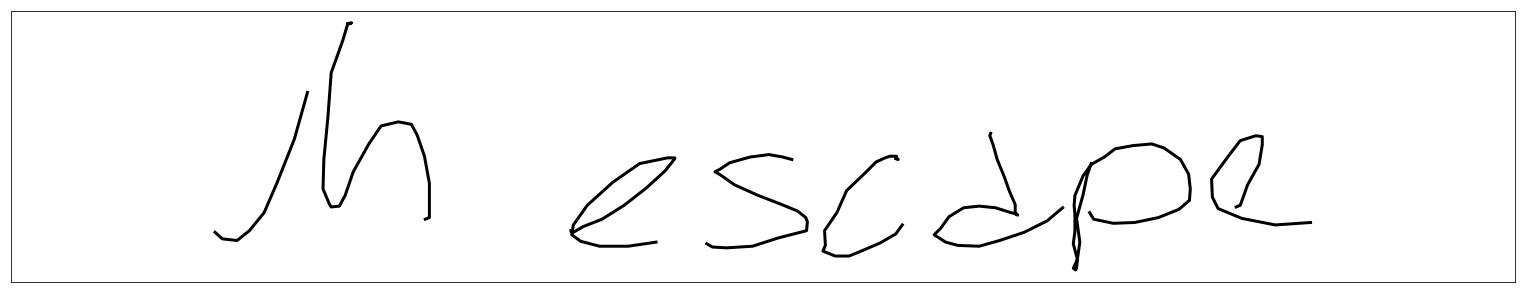

In [20]:
plot_stroke(stokes_t_c[9, :, :])

In [11]:
# print(stokes_t_c[20, :, :])
sentence = stokes_t_c[3, :, :]
print(len(sentence[np.where(sentence[:, 0] == 1.)]))

5


In [19]:
convert_one_hot_encoding_to_sentence(datagen.alphabet, sentences_input[0])

'eartopr'

In [13]:
lengths = []
for i in range(len(datagen.train_sentences)):
    lengths.append(len(datagen.train_sentences[i]))

In [14]:
print(np.max(lengths))
print(np.min(lengths))
print(np.mean(lengths))

65
9
30.672083333333333


In [15]:
strokes = datagen.train_strokes
for i in range(0, len(strokes)):
    for j in range(0, len(strokes[i])):
        if strokes[i][j][0] == 0. and strokes[i][j][1] == 0. and strokes[i][j][2] == 0.:
            print("deleted")